<a href="https://colab.research.google.com/github/sandeepthetechie/mastering_the_art_of_tensorflow/blob/master/03_CNN_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to convolutional neural networks and Computer Vision! 

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2021-09-16 21:33:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   189MB/s    in 0.6s    

2021-09-16 21:33:01 (189 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} Directories and {len(filenames)} images in {dirpath}.")

there are 2 Directories and 1 images in pizza_steak.
there are 2 Directories and 1 images in pizza_steak/train.
there are 0 Directories and 750 images in pizza_steak/train/steak.
there are 0 Directories and 750 images in pizza_steak/train/pizza.
there are 2 Directories and 1 images in pizza_steak/test.
there are 0 Directories and 250 images in pizza_steak/test/steak.
there are 0 Directories and 250 images in pizza_steak/test/pizza.


In [3]:
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))

In [4]:
num_steak_image_train 

750

In [5]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [6]:
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img


Image shape: (512, 384, 3)


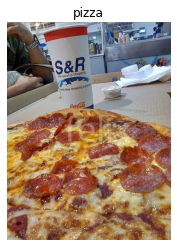

In [8]:
img = view_random_image(target_dir="pizza_steak/train", target_class="pizza")

 ## Let's build our own CNN!!

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup the path 
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory= train_dir, 
                                               batch_size = 32, 
                                               target_size = (224, 224),
                                               class_mode = "binary", 
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory= test_dir, 
                                               batch_size = 32, 
                                               target_size = (224, 224),
                                               class_mode = "binary", 
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, 
                           kernel_size=3, 
                           activation = "relu", 
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, 
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_1.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ["accuracy"] 
                )

history1 = model_1.fit(train_data, 
            epochs= 5, 
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 40s 253ms/step - loss: 0.5576 - accuracy: 0.7080 - val_loss: 0.3892 - val_accuracy: 0.8500
Epoch 2/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4072 - accuracy: 0.8180 - val_loss: 0.3167 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4085 - accuracy: 0.8133 - val_loss: 0.3341 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3424 - accuracy: 0.8540 - val_loss: 0.2912 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.2779 - accuracy: 0.8947 - val_loss: 0.2925 - val_accuracy: 0.8880


# Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


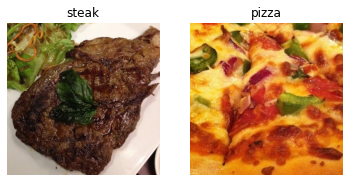

In [11]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train", "pizza")

In [12]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [14]:
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               target_size = (224, 224),
                                               class_mode = "binary", 
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size= (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
 # get sample of a train data batch 

 images, labels = train_data.next()
 len(images), len(labels)

(32, 32)

In [16]:
#get the first two images. 
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

# Creating a CNN (A baseline model to start with)

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [18]:
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1, 
         padding="valid", 
         activation="relu", 
         input_shape= (224, 224,3)),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(), 
  Dense(1, activation="sigmoid")
])

In [19]:
model_4.compile(loss = "binary_crossentropy", 
                optimizer = Adam(), 
                metrics= ["accuracy"])

history_4 = model_4.fit(train_data,
                        epochs = 5, 
                        steps_per_epoch= len(train_data), 
                        validation_data = test_data, 
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 246ms/step - loss: 0.8199 - accuracy: 0.6573 - val_loss: 0.4844 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4183 - accuracy: 0.8067 - val_loss: 0.4020 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3204 - accuracy: 0.8680 - val_loss: 0.3838 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.1740 - accuracy: 0.9507 - val_loss: 0.4792 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.0899 - accuracy: 0.9760 - val_loss: 0.3815 - val_accuracy: 0.8280


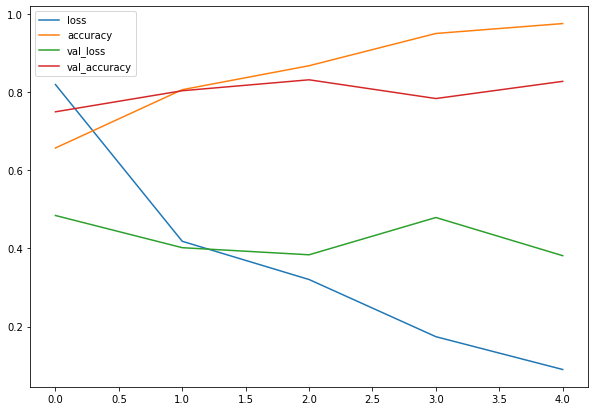

In [20]:
# Evaluating our model. 
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [21]:
def plot_loss_curve(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

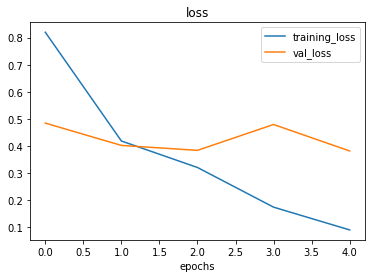

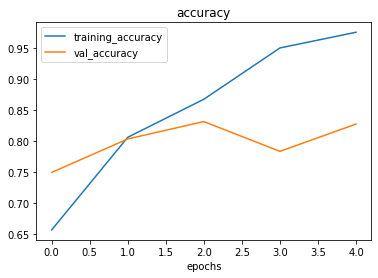

In [22]:
# Checkout the loss and accuracy of model_4
plot_loss_curve(history_4)

In [23]:
model_5 = Sequential([
  Conv2D(10,3, activation= "relu", input_shape= (224,224,3)),
  MaxPool2D(pool_size = 2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(), 
  Dense(1, activation= "sigmoid")
])

In [24]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [25]:
history_5 = model_5.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch= len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        )

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 0.6034 - accuracy: 0.6680 - val_loss: 0.4852 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5017 - accuracy: 0.7587 - val_loss: 0.4133 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4378 - accuracy: 0.8093 - val_loss: 0.3703 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4133 - accuracy: 0.8153 - val_loss: 0.3512 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3913 - accuracy: 0.8340 - val_loss: 0.3447 - val_accuracy: 0.8480


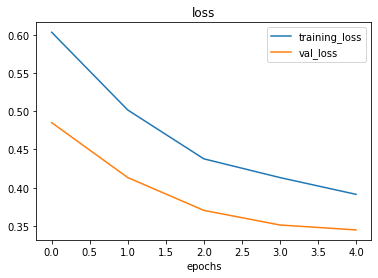

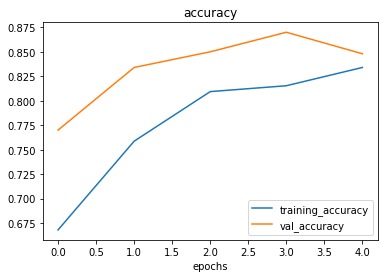

In [26]:
plot_loss_curve(history_5)

In [27]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2, 
                                             shear_range = 0.2,
                                             zoom_range = 0.2, 
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3, 
                                             horizontal_flip = True
                                             )

In [28]:
train_datagen = ImageDataGenerator(rescale = 1/255.)

test_datagen = ImageDataGenerator(rescale = 1/ 225.)

In [29]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                   target_size = (224,224),
                                                                   batch_size = 32, 
                                                                   class_mode = "binary",
                                                                   shuffle = False)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32, 
                                               class_mode = "binary",
                                               shuffle = False 
                                               )

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [30]:
test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size = (224,224),
                                             batch_size = 32, 
                                             class_mode = "binary"
                                             )

Found 500 images belonging to 2 classes.


In [31]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 27


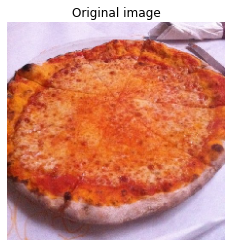

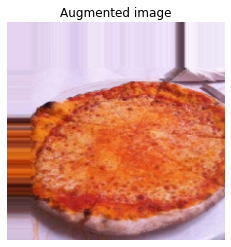

<Figure size 432x288 with 0 Axes>

In [32]:
import random
random_number = random.randint(0, 30)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)
plt.figure();


In [33]:
model_6 = Sequential([
  Conv2D(10,3, activation= "relu", input_shape= (224,224,3)),
  MaxPool2D(pool_size = 2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(), 
  Dense(1, activation= "sigmoid")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer= Adam(),  
                metrics = ["accuracy"])
history_6 = model_6.fit(train_data_augmented, 
            epochs = 5, 
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data, 
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 539ms/step - loss: 0.7278 - accuracy: 0.4253 - val_loss: 0.6853 - val_accuracy: 0.5880
Epoch 2/5
47/47 [==============================] - 25s 535ms/step - loss: 0.6884 - accuracy: 0.5253 - val_loss: 0.6635 - val_accuracy: 0.5460
Epoch 3/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6947 - accuracy: 0.5193 - val_loss: 0.6635 - val_accuracy: 0.7180
Epoch 4/5
47/47 [==============================] - 25s 534ms/step - loss: 0.7091 - accuracy: 0.5320 - val_loss: 0.6718 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6811 - accuracy: 0.5020 - val_loss: 0.6470 - val_accuracy: 0.5660


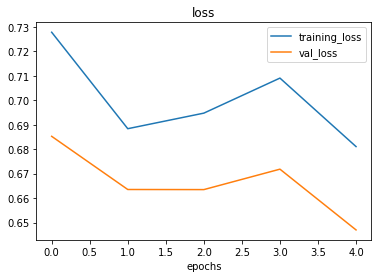

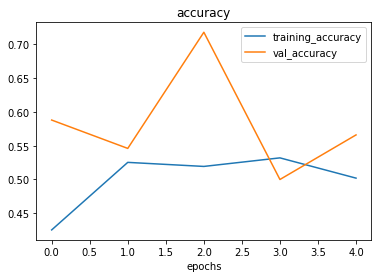

In [34]:
plot_loss_curve(history_6)

In [35]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                            target_size = (224, 224),
                                                                            class_mode = "binary",
                                                                            batch_size = 32, 
                                                                            shuffle = True)

Found 1500 images belonging to 2 classes.


In [36]:
model_7 = Sequential([
    Conv2D(10, 3, activation= "relu", input_shape = (224, 224,3 )),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(), 
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(), 
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [37]:
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(), 
                metrics = ["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data , 
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 536ms/step - loss: 0.6733 - accuracy: 0.5633 - val_loss: 0.6191 - val_accuracy: 0.6280
Epoch 2/5
47/47 [==============================] - 25s 528ms/step - loss: 0.5735 - accuracy: 0.6933 - val_loss: 0.6490 - val_accuracy: 0.6080
Epoch 3/5
47/47 [==============================] - 25s 528ms/step - loss: 0.5321 - accuracy: 0.7507 - val_loss: 0.3867 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 25s 525ms/step - loss: 0.5012 - accuracy: 0.7760 - val_loss: 0.3538 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 25s 527ms/step - loss: 0.4879 - accuracy: 0.7713 - val_loss: 0.3360 - val_accuracy: 0.8520


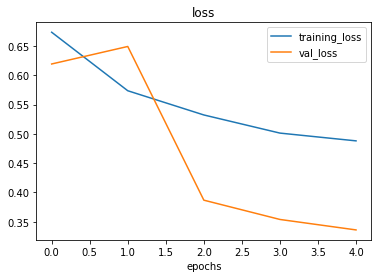

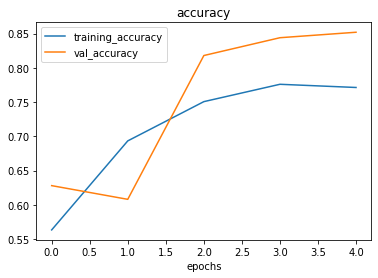

In [38]:
plot_loss_curve(history_7)

## Making a prediction on our trained model with our custom created data.

In [39]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-09-16 21:40:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-09-16 21:40:51 (33.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

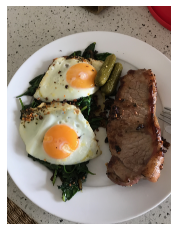

In [40]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [42]:
def load_and_prep_image(filename, img_shape=224):
  '''
  Reads and image from the filename and converts to tensor and reshapes it to (imageshape, imageshape, colour)
  '''
# Read the file
  img = tf.io.read_file(filename)
  # Decode image 
  img = tf.image.decode_image(img)
  # Resize image 
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [43]:
steak = load_and_prep_image("03-steak.jpeg")

In [44]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [45]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))

In [46]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [47]:
def pred_and_plot(model, filename, class_name =class_names):
  """
  Import and image located at the filename, makes a prediction with models and plots
  the image with the predicted class as the title.
  """

  # Import the target image and process it. 
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class 
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predict the class. 
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

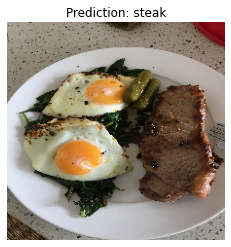

In [48]:
# Test the model on a custom image. 
pred_and_plot(model_7, "03-steak.jpeg")

## Multi-class Image classification problem.

In [49]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip our data 
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-09-16 22:02:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 64.233.191.128, 173.194.74.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   167MB/s    in 3.0s    

2021-09-16 22:02:47 (167 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [50]:
# Let's walk through the data. 
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} in {dirpath}")

there are 2 directories and 0 in 10_food_classes_all_data
there are 10 directories and 0 in 10_food_classes_all_data/train
there are 0 directories and 750 in 10_food_classes_all_data/train/chicken_curry
there are 0 directories and 750 in 10_food_classes_all_data/train/hamburger
there are 0 directories and 750 in 10_food_classes_all_data/train/steak
there are 0 directories and 750 in 10_food_classes_all_data/train/pizza
there are 0 directories and 750 in 10_food_classes_all_data/train/fried_rice
there are 0 directories and 750 in 10_food_classes_all_data/train/sushi
there are 0 directories and 750 in 10_food_classes_all_data/train/ramen
there are 0 directories and 750 in 10_food_classes_all_data/train/grilled_salmon
there are 0 directories and 750 in 10_food_classes_all_data/train/chicken_wings
there are 0 directories and 750 in 10_food_classes_all_data/train/ice_cream
there are 10 directories and 0 in 10_food_classes_all_data/test
there are 0 directories and 250 in 10_food_classes_all_

In [51]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [52]:
# Let's get the class names.
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (384, 512, 3)


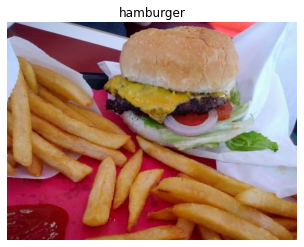

In [53]:
import random
img = view_random_image(target_dir =  train_dir,
                        target_class = random.choice(class_names))

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create a model (baseline)


In [63]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [64]:
model_8 = Sequential([
    Conv2D(10, 3, input_shape= (224,224,3), activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(), 
    Flatten(), 
    Dense(10, activation = "softmax")
])

model_8.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ["accuracy"])

history_8 = model_8.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))
                        

Epoch 1/5
235/235 [==============================] - 56s 236ms/step - loss: 2.1485 - accuracy: 0.2036 - val_loss: 1.9703 - val_accuracy: 0.3000
Epoch 2/5
235/235 [==============================] - 56s 240ms/step - loss: 1.8807 - accuracy: 0.3539 - val_loss: 1.8096 - val_accuracy: 0.3672
Epoch 3/5
235/235 [==============================] - 56s 238ms/step - loss: 1.5231 - accuracy: 0.4840 - val_loss: 1.9095 - val_accuracy: 0.3432
Epoch 4/5
235/235 [==============================] - 55s 235ms/step - loss: 0.8933 - accuracy: 0.7121 - val_loss: 2.4017 - val_accuracy: 0.3136
Epoch 5/5
235/235 [==============================] - 55s 233ms/step - loss: 0.3331 - accuracy: 0.9011 - val_loss: 3.5476 - val_accuracy: 0.2916


In [65]:
# Evaluate 
model_8.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 3.5476 - accuracy: 0.2916


[3.5476338863372803, 0.29159998893737793]

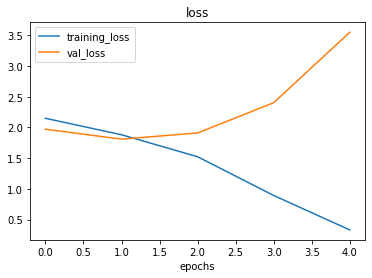

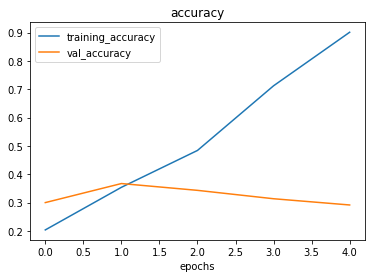

In [66]:
# Check out the model's loss curve on the 10 classes. 
plot_loss_curve(history_8)

In [67]:
# Try a simplified model (removed two layers)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 213ms/step - loss: 2.1062 - accuracy: 0.2535 - val_loss: 1.9480 - val_accuracy: 0.3116
Epoch 2/5
235/235 [==============================] - 50s 212ms/step - loss: 1.7730 - accuracy: 0.3993 - val_loss: 1.8590 - val_accuracy: 0.3660
Epoch 3/5
235/235 [==============================] - 49s 210ms/step - loss: 1.4132 - accuracy: 0.5320 - val_loss: 1.8762 - val_accuracy: 0.3616
Epoch 4/5
235/235 [==============================] - 50s 212ms/step - loss: 0.9565 - accuracy: 0.6983 - val_loss: 2.0822 - val_accuracy: 0.3516
Epoch 5/5
235/235 [==============================] - 50s 211ms/step - loss: 0.5364 - accuracy: 0.8447 - val_loss: 2.5102 - val_accuracy: 0.3308


# Trying to reduce overfitting by using augmented data

In [68]:
# trying to reduce overfitting by using aumented data. 

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 0.2, 
                                          width_shift_range = 0.2, 
                                          height_shift_range = 0.2, 
                                          zoom_range = 0.2,
                                          horizontal_flip = True )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                               target_size = (224,224),
                                               batch_size = 32, 
                                               class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [69]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(), 
                 metrics = ["accuracy"])

In [70]:
# Fit the model. 
history_10 = model_10.fit(train_data_augmented, 
                          epochs = 5, 
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data, 
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 131s 555ms/step - loss: 2.1871 - accuracy: 0.2027 - val_loss: 1.9724 - val_accuracy: 0.2996
Epoch 2/5
235/235 [==============================] - 129s 548ms/step - loss: 2.0348 - accuracy: 0.2780 - val_loss: 1.8847 - val_accuracy: 0.3544
Epoch 3/5
235/235 [==============================] - 129s 547ms/step - loss: 1.9518 - accuracy: 0.3179 - val_loss: 1.8250 - val_accuracy: 0.3688
Epoch 4/5
235/235 [==============================] - 130s 552ms/step - loss: 1.9049 - accuracy: 0.3364 - val_loss: 1.7548 - val_accuracy: 0.4040
Epoch 5/5
235/235 [==============================] - 129s 550ms/step - loss: 1.8691 - accuracy: 0.3649 - val_loss: 1.8177 - val_accuracy: 0.3828


In [71]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 157ms/step - loss: 3.5476 - accuracy: 0.2916


[3.5476348400115967, 0.29159998893737793]

In [72]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 158ms/step - loss: 1.8177 - accuracy: 0.3828


[1.817720651626587, 0.38280001282691956]

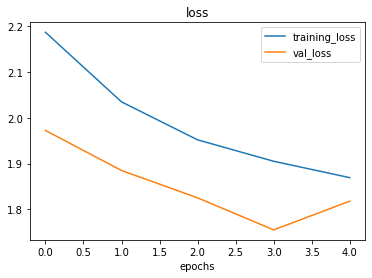

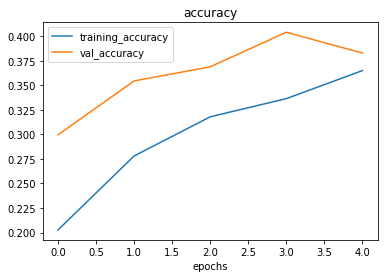

In [73]:
plot_loss_curve(history_10)

In [74]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [74]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [87]:
# Make a prediction using model_11
# pred_and_plot(model=model_10, 
#               filename="03-steak.jpeg", 
#               class_name=class_names)

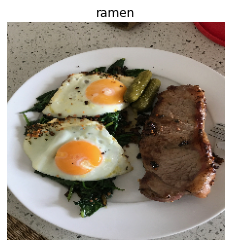

In [81]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_10.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [84]:

# Check the output of the predict function
pred = model_10.predict(tf.expand_dims(img, axis=0))
pred

array([[0.15865375, 0.01977122, 0.08394615, 0.14001289, 0.09131721,
        0.02803161, 0.04700046, 0.19347203, 0.16815288, 0.06964187]],
      dtype=float32)

In [85]:
# Find the predicted class name
class_names[pred.argmax()]

'ramen'

In [91]:

# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

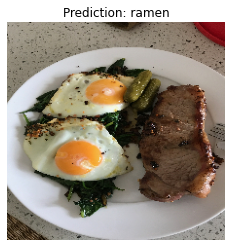

In [96]:
pred_and_plot(model_10, "03-steak.jpeg", class_names)

In [97]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names)

NotFoundError: ignored

In [98]:
# Save a model
model_10.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [99]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 1.8177 - accuracy: 0.3828


[1.817720890045166, 0.38280001282691956]

In [101]:
# Compare our unsaved model's results (same as above)
model_10.evaluate(test_data)


79/79 [==============================] - 13s 163ms/step - loss: 1.8177 - accuracy: 0.3828


[1.8177211284637451, 0.38280001282691956]